<a href="https://colab.research.google.com/github/bartolomeoadrian/computational-vision/blob/main/02_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [8]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Lectura y Despliegue de Imagen

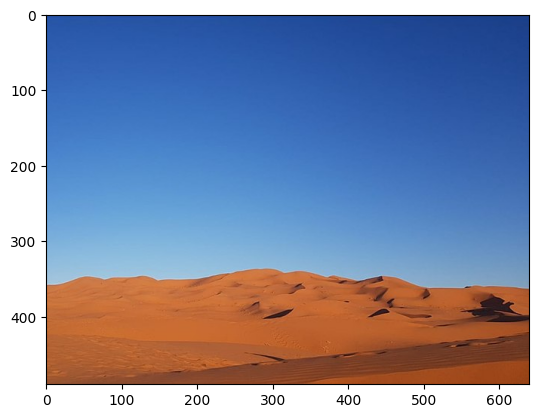

In [19]:
image_url = 'https://raw.githubusercontent.com/bartolomeoadrian/computational-vision/refs/heads/main/assets/images/desert.jpg'

# Download the image
response = requests.get(image_url)
with open('desert.jpg', 'wb') as f:
    f.write(response.content)

# Read the image using cv2.imread
img = cv2.imread('desert.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# Canales de color

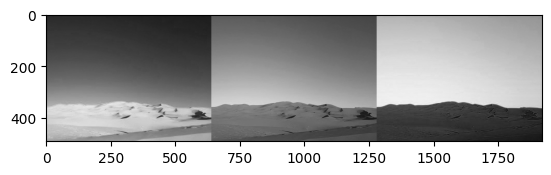

In [28]:
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]
img_rgb_gray = np.concatenate((R,G,B),axis=1)

plt.imshow(img_rgb_gray, cmap='gray')
plt.show()

# Unificación de los tres canales

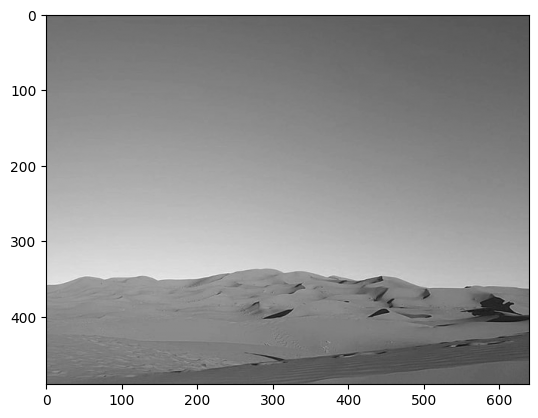

In [27]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)

k  = (1/3, 1/3, 1/3)
Zd = k[0] * Rd + k[1] * Gd + k[2] * Bd

Z  = Zd.astype(int)
plt.imshow(Z, cmap='gray')
plt.show()

# Histograma de la imagen

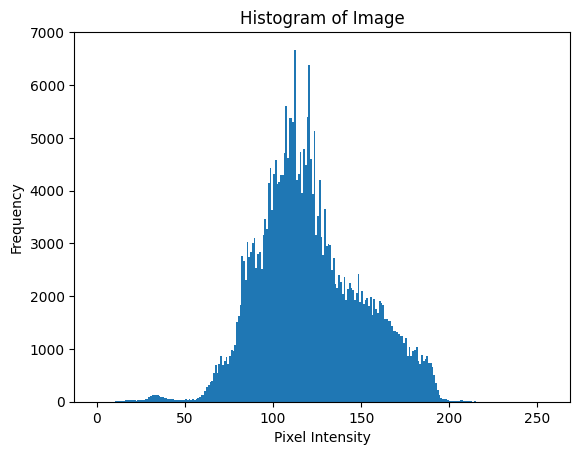

In [24]:
plt.hist(Z.ravel(), bins=256, range=[0,256])
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Imagen multiplicado por diferentes factores

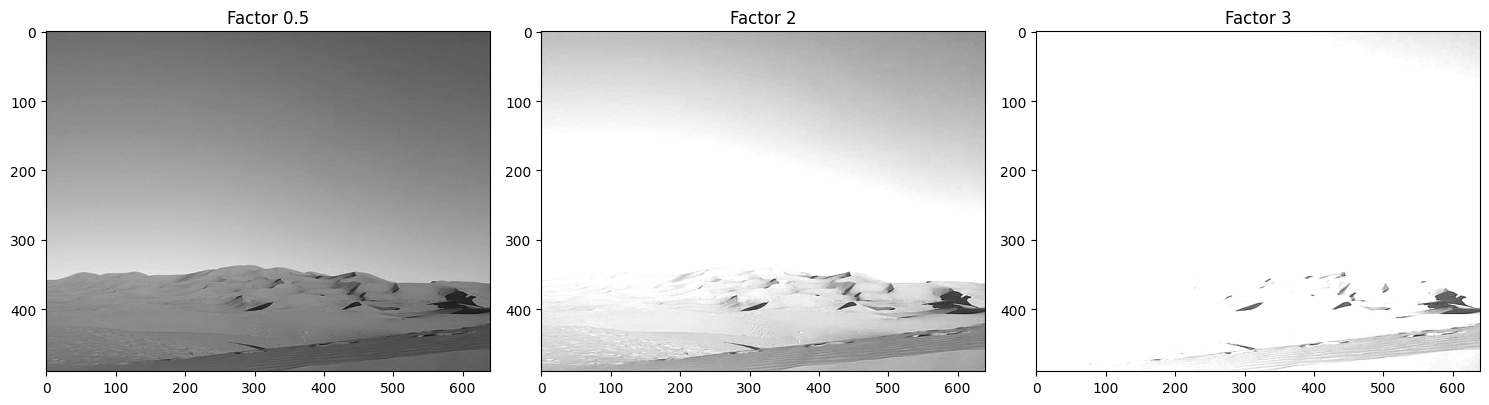

In [31]:
# Multiply the grayscale image by different factors
Z_half = Z * 0.5
Z_double = Z * 2
Z_triple = Z * 3

# Ensure pixel values remain within the valid range (0-255 for uint8 display)
Z_half = np.clip(Z_half, 0, 255).astype(np.uint8)
Z_double = np.clip(Z_double, 0, 255).astype(np.uint8)
Z_triple = np.clip(Z_triple, 0, 255).astype(np.uint8)

# Display the images together
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(Z_half, cmap='gray')
axes[0].set_title('Factor 0.5')

axes[1].imshow(Z_double, cmap='gray')
axes[1].set_title('Factor 2')

axes[2].imshow(Z_triple, cmap='gray')
axes[2].set_title('Factor 3')

plt.tight_layout()
plt.show()

# Transformada de Hough

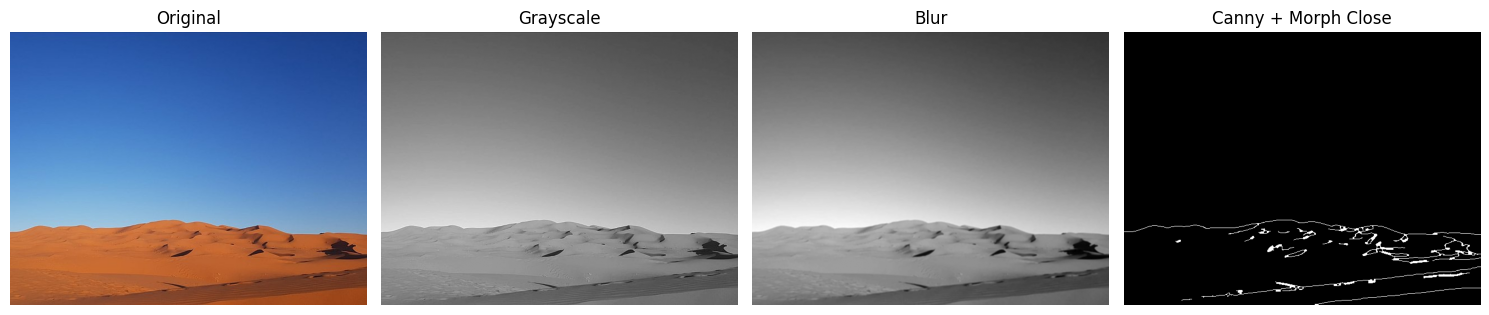

In [74]:
# Convert the grayscale image to uint8
Z_uint8 = Z.astype(np.uint8)

# Apply techniques to reduce noise
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blur, 30, 90)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(blur, cmap='gray')
axes[2].set_title('Blur')
axes[2].axis('off')

axes[3].imshow(edges, cmap='gray')
axes[3].set_title('Canny + Morph Close')
axes[3].axis('off')

plt.tight_layout()
plt.show()

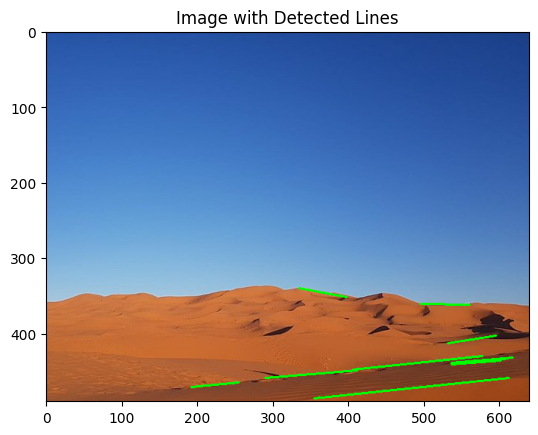

In [75]:
# Apply probabilistic Hough Line Transform
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/360,
    threshold=60,
    minLineLength=60,
    maxLineGap=12
)

# Create a copy of the original color image
img_with_lines = np.copy(img_rgb)

# Check if any lines were detected
if lines is not None:
    # Iterate through the detected lines and draw them on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with detected lines
plt.imshow(img_with_lines)
plt.title('Image with Detected Lines')
plt.show()